In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

## 統計モデリングとは
---
統計モデルとは確率モデルをデータに当てはめたものであり、統計モデルを用いて現象やその背後の仕組みを理解する取り組みが統計モデリングである。

<table class="text-center border">
    <tr class="border-bottom">
        <th class="border-right-bold">モデル</th>
        <td class="text-left">複雑な現象・構造から必要な部分のみを取り出して単純化したもの</td>
    </tr>
    <tr class="border-bottom">
        <th class="border-right-bold">数理モデル</th>
        <td class="text-left">モデルの記述に数式を用いるもの</td>
    </tr>
    <tr class="border-bottom">
        <th class="border-right-bold">確率モデル</th>
        <td class="text-left">数理モデルの中に確率分布を取り込んだもの</td>
    </tr>
    <tr class="border-bottom">
        <th class="border-right-bold">統計モデル</th>
        <td class="text-left">確率モデルをデータに当てはめたもの</td>
    </tr>
</table>

＜モデルの例＞  
売り上げは気温と関係がある。

＜数理モデルの例＞  
$y=ax$

＜確率モデルの例＞  
$y=ax+\epsilon $  
$\epsilon \sim \mathcal{N}( 0,\sigma ^{2})$

＜統計モデルの例＞  
$y=2.5x+\epsilon $  
$\epsilon \sim \mathcal{N}( 0,0.1)$

## パス図 (path diagram)
---
複雑なモデルになると数式だけでは構造がわかりにくいので、パス図も併用する。  
パス図とは、実際に観測された変数を四角形、観測されない潜在変数・誤差変数を円・楕円で表し、それら変数間の因果関係を一方向の矢印、相関関係を双方向の矢印で表した図である。

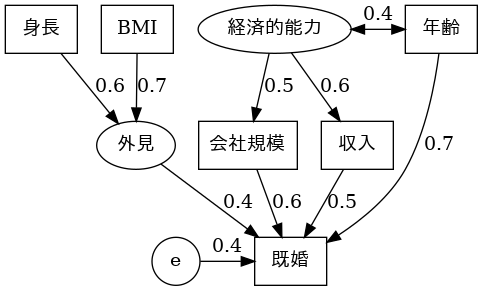

In [2]:
from IPython.display import Image
from my_functions.introduction_to_statistical_modeling import path_diagram

Image(path_diagram.get_png())

上のパス図は以下のモデル式を表す。 (誤差項には正規分布を仮定している)

$
\displaystyle  \begin{array}
    {>{\displaystyle}l}
    会社規模=0.5\times 経済的能力\\
    収入=0.6\times 経済的能力\\
    r( 経済的能力,年齢) =0.4\\
    外見=0.6\times 身長+0.7\times BMI\\
    既婚=0.4\times 外見+0.6\times 会社規模+0.5\times 収入+0.7\times 年齢+\epsilon \\
    \epsilon \sim \mathcal{Normal}( 0,0.4)
\end{array}
$

例示のために簡単にしてあるが、実際には全ての回帰式に誤差項を設定すべきなのでより複雑になる。

###### 練習問題

単回帰分析 $y=ax+\epsilon $ を表すパス図を手書きで作成する。 (切片項は考えなくてよい)

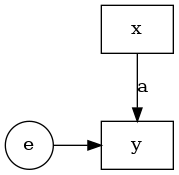

In [3]:
g = nx.DiGraph()
g = nx.nx_agraph.to_agraph(g)

g.add_nodes_from(['x', 'y'], shape='box')
g.add_node('e', shape='circle')
g.add_subgraph(['y', 'e'], rank='same')
g.add_edge(['x', 'y'], label='a')
g.add_edge(['e', 'y'])

Image(g.draw(format='png', prog='dot'))